In [ ]:
import pandas as pd
import numpy as np
import matplotlib 
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test_data_games.csv to test_data_games.csv
Saving train_data_games.csv to train_data_games.csv


In [ ]:
train_data = pd.read_csv('train_data_games.csv')
test_data = pd.read_csv('test_data_games.csv')
train_data['source']='train'
test_data['source']='test'
data = pd.concat([train_data, test_data],ignore_index = True)
data.head()

,ID,seasonId,teamId,playerId,regionCode,positionText,positionCode,ranking,minsPlayed,rating,...,shotSixYardBox,shotPenaltyArea,shotOboxTotal,shotsTotal,tackleWonTotal,tackleTotalAttempted,challengeLost,positionGeneral,apps,source
0,111,8228,167,331254,gb-eng,Midfielder,FW,1,90,9.290000,...,0.000000,2.000000,0.000000,2.000000,2.000000,3.000000,1.000000,Striker,1,train
1,112,8228,167,73084,be,Midfielder,FW,2,86,8.490000,...,0.000000,2.000000,3.000000,5.000000,0.000000,1.000000,1.000000,Striker,1,train
2,113,8228,167,104749,dz,Forward,FW,3,167,7.995000,...,0.000000,1.500000,1.500000,3.000000,0.500000,1.500000,1.000000,Striker,2,train
3,114,8228,211,21683,gb-eng,Midfielder,FW,4,90,7.830000,...,0.000000,3.000000,1.000000,4.000000,5.000000,8.000000,3.000000,Striker,1,train
4,115,8228,30,83532,gb-eng,Forward,FW,5,3087,7.787143,...,0.428571,1.971429,1.514286,3.914286,0.628571,1.142857,0.514286,Striker,35,train


In [ ]:
data.shape

(60273, 112)

In [ ]:
data.columns

Index(['ID', 'seasonId', 'teamId', 'playerId', 'regionCode', 'positionText',
       'positionCode', 'ranking', 'minsPlayed', 'rating',
       ...
       'shotSixYardBox', 'shotPenaltyArea', 'shotOboxTotal', 'shotsTotal',
       'tackleWonTotal', 'tackleTotalAttempted', 'challengeLost',
       'positionGeneral', 'apps', 'source'],
      dtype='object', length=112)

In [ ]:
df = data.copy()
df['Name'] = data['name']
df['Position'] = data['positionCode']
df['Clearances_Total'] = data['clearanceTotal'].copy()
df['Shots_Feet'] = data['shotRightFoot'] + data['shotLeftFoot']
df['Dribbles_Total'] = data['dribbleTotal']
df['Shots_Head'] = data['shotHead']
df['Interceptions_Total'] = data['interceptionAll']
df['Shots_InTheBox'] = data['shotSixYardBox'] + data['shotPenaltyArea']
df['Aerial_Challenges'] = data['duelAerialTotal']
df['Passes_Short'] = data['shortPassAccurate'] + data['shortPassInaccurate']
df['Shots_OutOfBox'] = data['shotOboxTotal']
df['Blocks_Shots'] = data['outfielderBlock']
df['Passes_Long'] = data['passLongBallInaccurate'] + data['passLongBallAccurate']
df['Tackles_Total'] = data['tackleTotalAttempted']
df['Blocks_Passes'] = data['outfielderBlockedPass']
df['Passes_TotalCross'] = data['passCrossInaccurate'] + data['passCrossAccurate']
df['Blocks_Crosses'] = data['passCrossBlockedDefensive']
df['Rating'] = data['rating']
cols = ['Name','Position','Clearances_Total','Shots_Feet','Dribbles_Total','Shots_Head','Interceptions_Total','Shots_InTheBox',
        'Aerial_Challenges','Passes_Short','Shots_OutOfBox','Blocks_Shots','Passes_Long','Tackles_Total','Blocks_Passes', 'Passes_TotalCross','Blocks_Crosses','Rating', 'source']
df = df[cols]
df.head()

,Name,Position,Clearances_Total,Shots_Feet,Dribbles_Total,Shots_Head,Interceptions_Total,Shots_InTheBox,Aerial_Challenges,Passes_Short,Shots_OutOfBox,Blocks_Shots,Passes_Long,Tackles_Total,Blocks_Passes,Passes_TotalCross,Blocks_Crosses,Rating,source
0,Phil Foden,FW,0.000000,2.000000,3.000000,0.000000,3.000000,2.0,3.000000,27.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1.000000,0.000000,9.290000,train
1,Kevin De Bruyne,FW,0.000000,5.000000,2.000000,0.000000,1.000000,2.0,2.000000,31.000000,3.000000,0.000000,3.000000,1.000000,1.000000,2.000000,0.000000,8.490000,train
2,Riyad Mahrez,FW,1.000000,3.000000,3.500000,0.000000,0.000000,1.5,0.000000,48.000000,1.500000,0.000000,3.000000,1.500000,0.000000,3.000000,0.000000,7.995000,train
3,Adam Lallana,FW,0.000000,3.000000,1.000000,1.000000,1.000000,3.0,2.000000,43.000000,1.000000,0.000000,0.000000,8.000000,1.000000,0.000000,0.000000,7.830000,train
4,Harry Kane,FW,1.114286,3.142857,2.857143,0.771429,0.314286,2.4,5.428571,22.914286,1.514286,0.314286,3.028571,1.142857,0.485714,1.085714,0.028571,7.787143,train


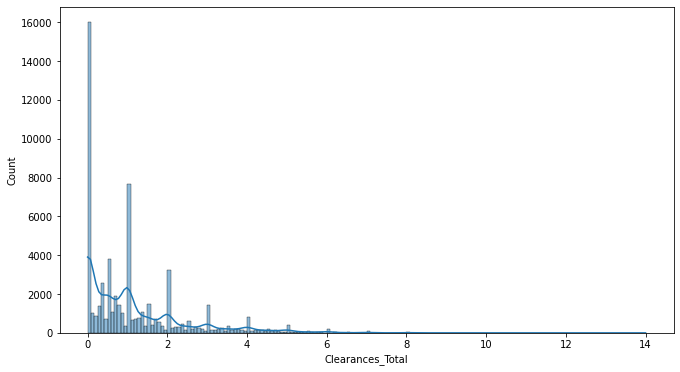

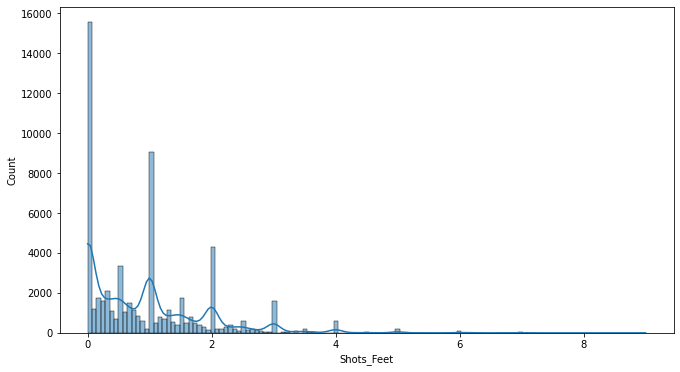

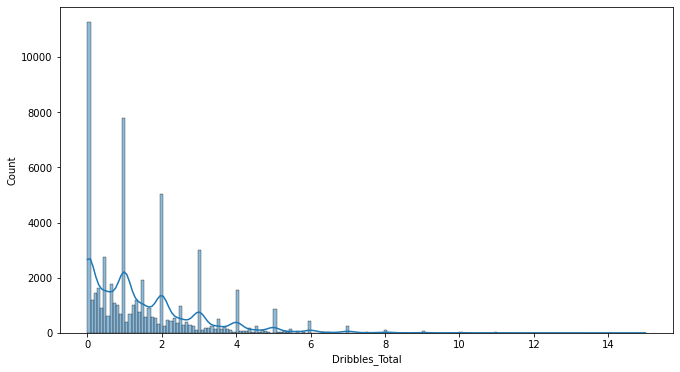

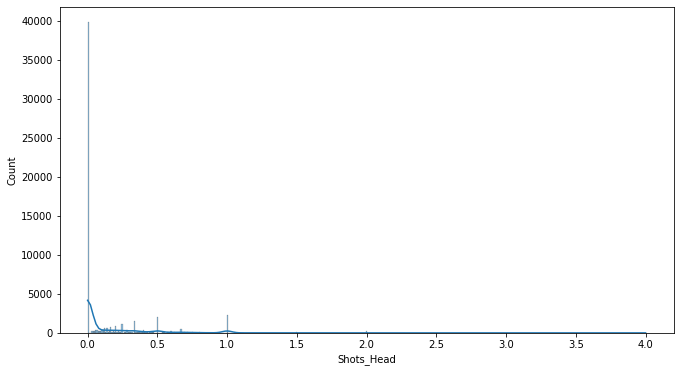

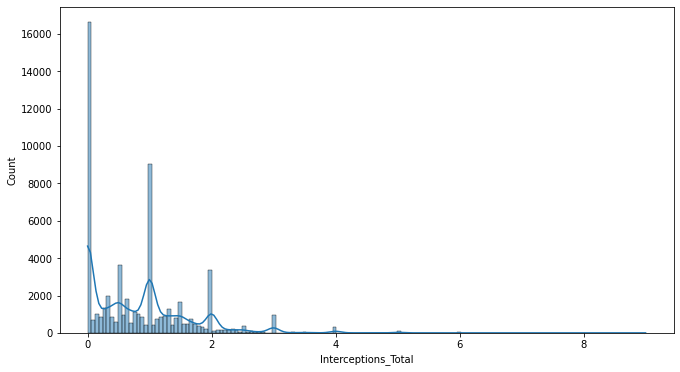

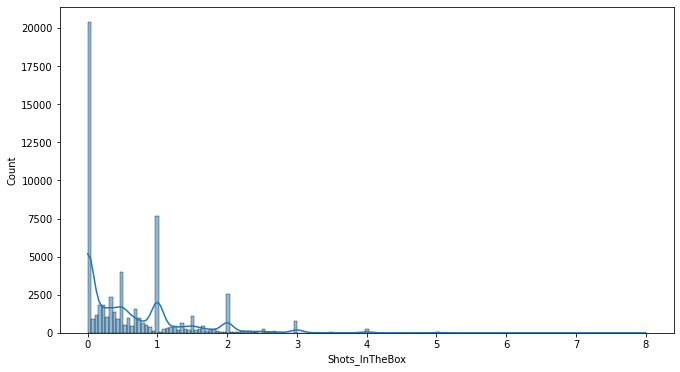

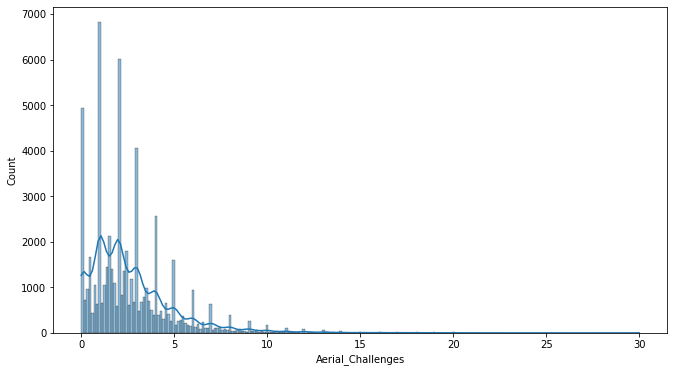

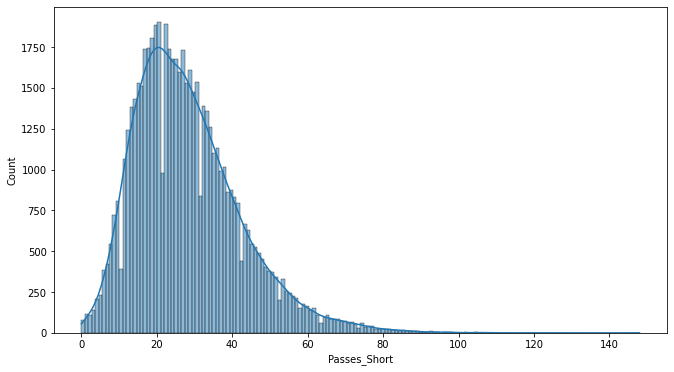

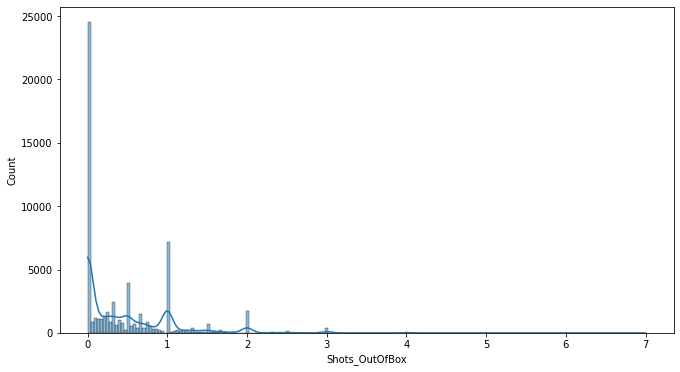

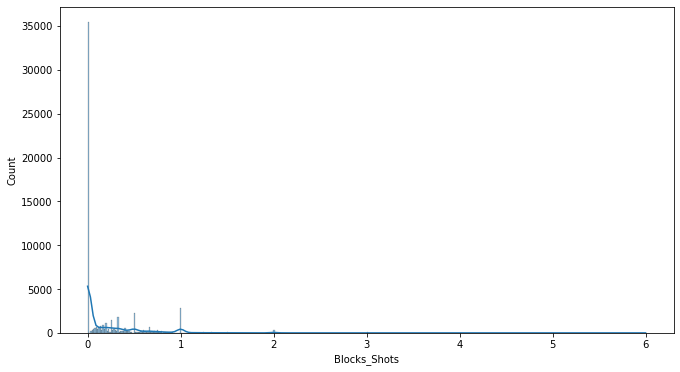

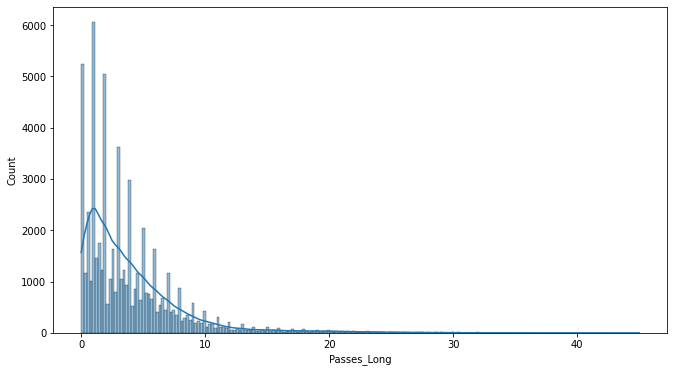

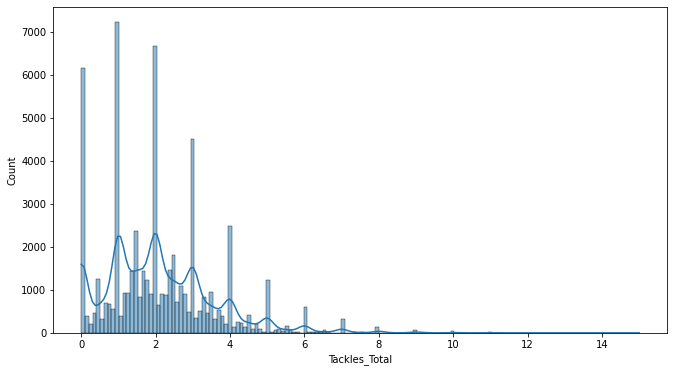

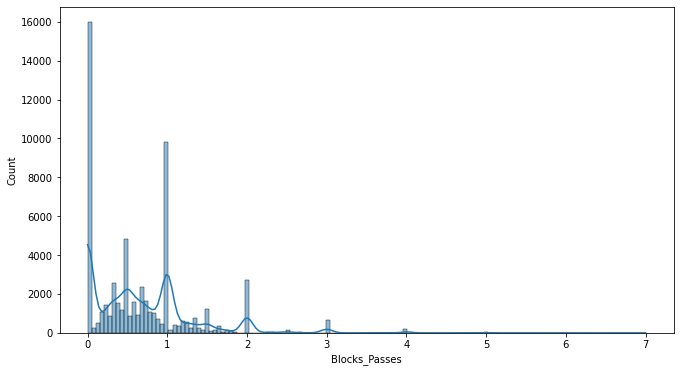

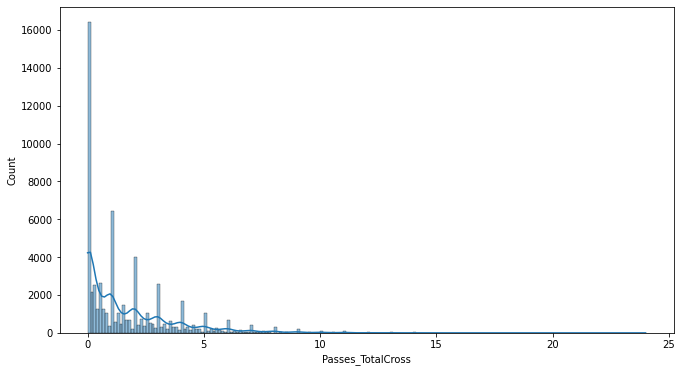

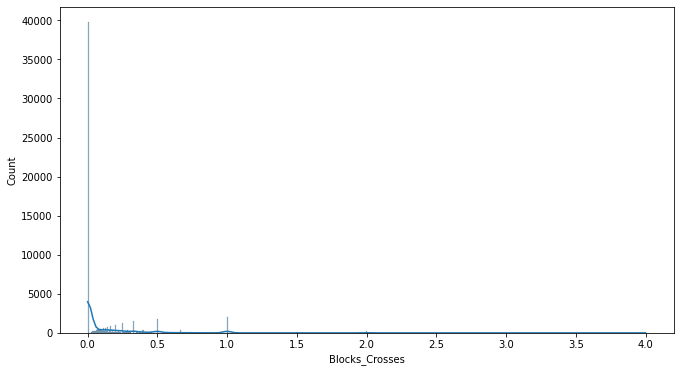

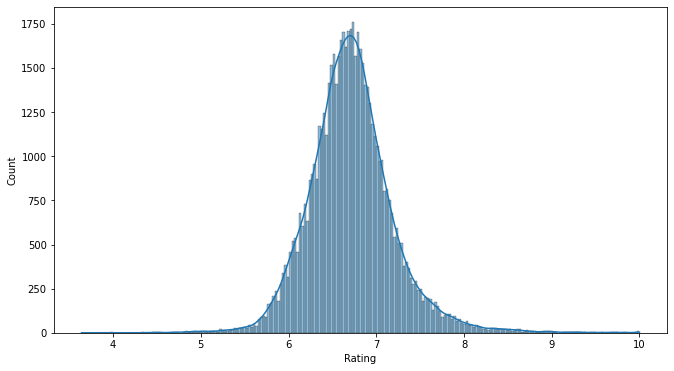

In [ ]:
for i in cols[2:-1]:
  plt.figure(figsize = (11, 6))
  sns.histplot(data = df[i], kde = True)

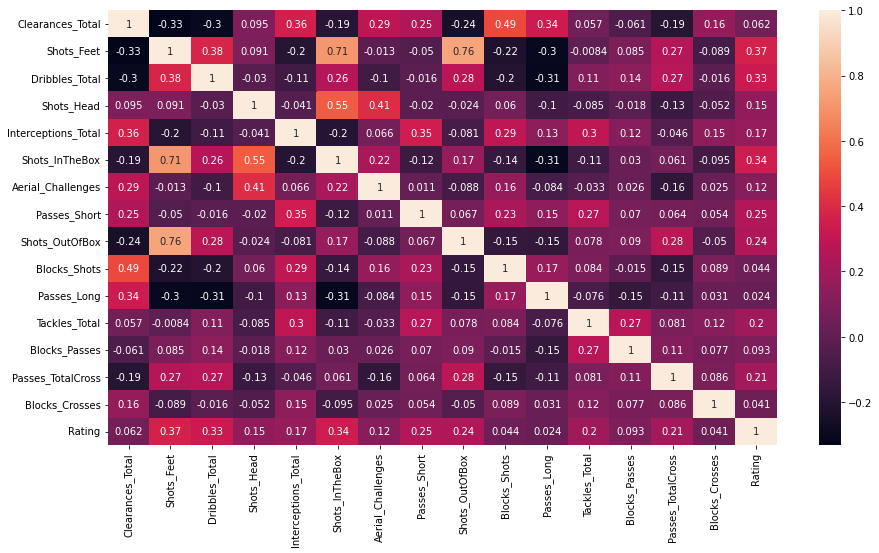

In [ ]:
plt.figure(figsize=(15,8))
dataplot = sns.heatmap(df.corr(), annot = True)
plt.show()

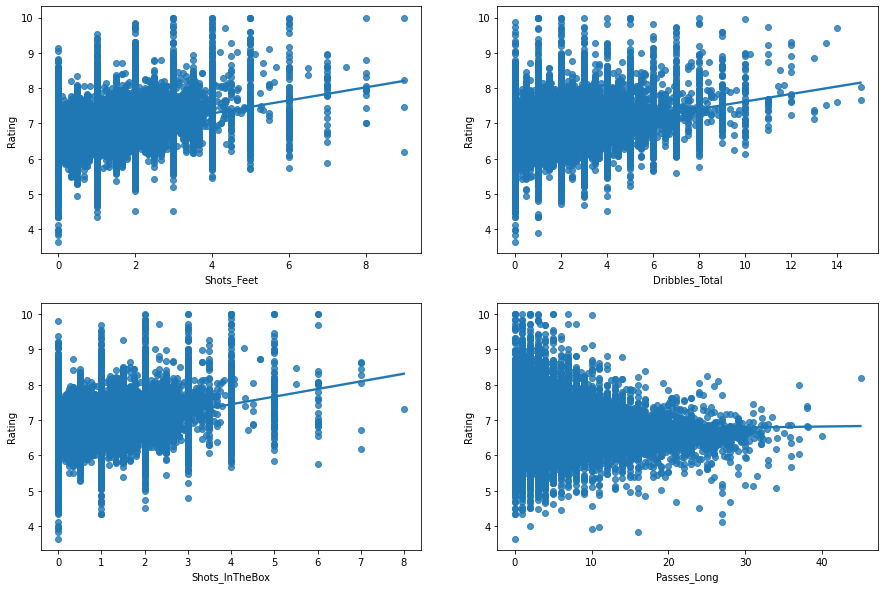

In [ ]:
f, axes = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.regplot(data= df, x='Shots_Feet', y='Rating')
plt.subplot(222)
sns.regplot(data= df, x='Dribbles_Total', y='Rating')
plt.subplot(223)
sns.regplot(data= df, x='Shots_InTheBox', y='Rating')
plt.subplot(224)
sns.regplot(data= df, x='Passes_Long', y='Rating')

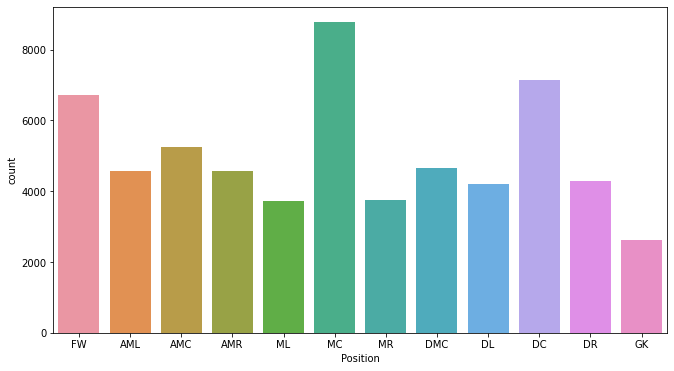

In [ ]:
plt.figure(figsize=(11,6))
sns.countplot(x = 'Position', data = df)
plt.show()

In [ ]:
df = pd.get_dummies(df, columns=['Position'])
df.head()

,Name,Clearances_Total,Shots_Feet,Dribbles_Total,Shots_Head,Interceptions_Total,Shots_InTheBox,Aerial_Challenges,Passes_Short,Shots_OutOfBox,...,Position_AMR,Position_DC,Position_DL,Position_DMC,Position_DR,Position_FW,Position_GK,Position_MC,Position_ML,Position_MR
0,Phil Foden,0.000000,2.000000,3.000000,0.000000,3.000000,2.0,3.000000,27.000000,0.000000,...,0,0,0,0,0,1,0,0,0,0
1,Kevin De Bruyne,0.000000,5.000000,2.000000,0.000000,1.000000,2.0,2.000000,31.000000,3.000000,...,0,0,0,0,0,1,0,0,0,0
2,Riyad Mahrez,1.000000,3.000000,3.500000,0.000000,0.000000,1.5,0.000000,48.000000,1.500000,...,0,0,0,0,0,1,0,0,0,0
3,Adam Lallana,0.000000,3.000000,1.000000,1.000000,1.000000,3.0,2.000000,43.000000,1.000000,...,0,0,0,0,0,1,0,0,0,0
4,Harry Kane,1.114286,3.142857,2.857143,0.771429,0.314286,2.4,5.428571,22.914286,1.514286,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
train = df.loc[df['source']=="train"]
test = df.loc[df['source']=="test"]
test.drop(['source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
x_train = train.drop(['Rating','Name'], axis = 1)
y_train = train.Rating
x_test = test.drop(['Rating','Name'], axis = 1)
y_test = test.Rating

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
 
model = Sequential()
 
model.add(Dense(units=10, input_dim=27, kernel_initializer='normal', activation='relu'))
 
model.add(Dense(units=10, kernel_initializer='normal', activation='tanh'))
 
model.add(Dense(1, kernel_initializer='normal'))
 
model.compile(loss='mean_squared_error', optimizer='adam')
 
model.fit(x_train, y_train ,batch_size = 20, epochs = 50, verbose=1)

Epoch 1/50
1978/1978 [==============================] - 5s 2ms/step - loss: 4.5178
Epoch 2/50
1978/1978 [==============================] - 4s 2ms/step - loss: 0.1966
Epoch 3/50
1978/1978 [==============================] - 4s 2ms/step - loss: 0.1454
Epoch 4/50
1978/1978 [==============================] - 5s 2ms/step - loss: 0.1411
Epoch 5/50
1978/1978 [==============================] - 4s 2ms/step - loss: 0.1399
Epoch 6/50
1978/1978 [==============================] - 4s 2ms/step - loss: 0.1390
Epoch 7/50
1978/1978 [==============================] - 5s 2ms/step - loss: 0.1386
Epoch 8/50
1978/1978 [==============================] - 4s 2ms/step - loss: 0.1379
Epoch 9/50
1978/1978 [==============================] - 4s 2ms/step - loss: 0.1378
Epoch 10/50
1978/1978 [==============================] - 5s 2ms/step - loss: 0.1373
Epoch 11/50
1978/1978 [==============================] - 4s 2ms/step - loss: 0.1371
Epoch 12/50
1978/1978 [==============================] - 4s 2ms/step - loss: 0.1372
E

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn import metrics
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)
print("RMSE for train set : %.4g" % np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print("RMSE for test set : %.4g" % np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print("MSE for train set : %.4g" %(metrics.mean_squared_error(y_train, y_pred_train)))
print("MSE for test set : %.4g" % (metrics.mean_squared_error(y_test, y_pred_test)))
print("MAE for train set : %.4g" % (metrics.mean_absolute_error(y_train, y_pred_train)))
print("MAE for test set : %.4g" % (metrics.mean_absolute_error(y_test, y_pred_test)))

1236/1236 [==============================] - 2s 1ms/step
RMSE for train set : 0.3647
RMSE for test set : 0.3785
MSE for train set : 0.133
MSE for test set : 0.1433
MAE for train set : 0.2585
MAE for test set : 0.2672
